
Given problem:
x * (x - 1) * y'' - x * y' + y  = 0
y'(1) = 3
y(3) - 3 * y'(3) = -4

We will convert this to system of equations with order = 1:
y' = g(x, y, z) = z
z' = f(x, y, z) = (x * y' - y) / (x * (x - 1))
z(1) = 3
y(3) - 3 * z(3) = -4

1.0 3.0 (1.000001, 3) 0.1
[1.0, 9842.568564867945, 38201.056251157504, 83523.68779047695, 144503.1092300633, 220019.22604132834, 309101.54517392267, 410901.0913549347, 524668.9309517357, 649739.4706849187, 785517.2766976471, 931466.5338527274, 1087102.5160304946, 1251984.6097581661, 1425710.5529774507, 1607911.6354053307, 1798248.667878353, 1996408.572584162, 2202101.4790424556, 2415058.2354051704, 2635028.2633811]
y; =  2458241.8949340633
PJO =  -4069265.5461134515 -4476191.890335576
next =  3.000001034040798
y; =  5.196723084178689
1.0 3.0 (1.000001, 3) 0.05
[1.0, 2480.824430699656, 9765.556458559626, 21635.814254549907, 37892.110615359634, 58351.609717570165, 82846.10468416709, 111220.332139456, 143330.53519608863, 179043.23070982198, 218234.14

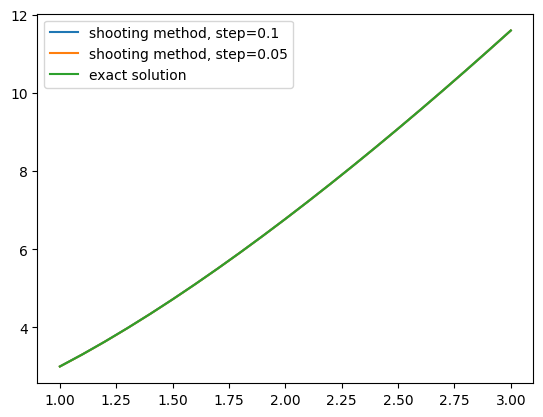

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def df(x_test, x, y):
    """
    Calculate first derivative of tabular function f(x) = y at point=x_test
    Returns df(x_test)
    """
    assert len(x) == len(y)
    visited = False
    for interval in range(len(x) - 1):
        if x[interval] <= x_test < x[interval+1]:
            i = interval
            visited = True
            break

    if not visited or (visited and i > len(x) - 3):
        i = len(x) - 3
    a1 = (y[i+1] - y[i]) / (x[i+1] - x[i])
    a2 = ((y[i+2] - y[i+1]) / (x[i+2] - x[i+1]) - a1) / (x[i+2] - x[i]) * (2*x_test - x[i] - x[i+1])
    return a1 + a2



def f(x, y, z):
    return (2 * x * z - 2 * y) / (x**2 + 1)


def g(x, y, z):
    return z


def exact_solution(x):
    return x - x**2 + 1


def euler_method(f, g, y0, z0, interval, h):
    """
    Solve cauchy problem:
    y' = g(x, y, z)
    z' = f(x, y, z)
    y(0) = y0
    z(0) = z0
    where x in interval, h - step using euler method
    Returns solution - tabular function y=f(x) as two arrays: x, y
    """
    l, r = interval
    x = [i for i in np.arange(l, r + h, h)]
    y = [y0]
    z = z0
    for i in range(len(x) - 1):
        z += h * f(x[i], y[i], z)
        y.append(y[i] + h * g(x[i], y[i], z))
    return x, y


def runge_kutta_method(f, g, y0, z0, interval, h, return_z=False, exclude_num=None):
    """
    Solve cauchy problem:
    y' = g(x, y, z)
    z' = f(x, y, z)
    y(0) = y0
    z(0) = z0
    where x in interval, h - step using runge-kutta method
    Returns solution - tabular function y=f(x) as two arrays: x, y
    If return_z is true, function will also return coefficients for z
    """
    l, r = interval
    x = [i for i in np.arange(l, r + h, h)]
    if exclude_num:
        x.pop(x.index(exclude_num))
    y = [y0]
    z = [z0]
    for i in range(len(x) - 1):
        K1 = h * g(x[i], y[i], z[i])
        L1 = h * f(x[i], y[i], z[i])
        K2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K1, z[i] + 0.5 * L1)
        L2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K1, z[i] + 0.5 * L1)
        K3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K2, z[i] + 0.5 * L2)
        L3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K2, z[i] + 0.5 * L2)
        K4 = h * g(x[i] + h, y[i] + K3, z[i] + L3)
        L4 = h * f(x[i] + h, y[i] + K3, z[i] + L3)
        delta_y = (K1 + 2 * K2 + 2 * K3 + K4) / 6
        delta_z = (L1 + 2 * L2 + 2 * L3 + L4) / 6
        y.append(y[i] + delta_y)
        z.append(z[i] + delta_z)

    if not return_z:
        return x, y
    else:
        return x, y, z




def f(x, y, z):
    return (x * z - y) / (x * (x - 1))


def g(x, y, z):
    return z


# Functions for finite difference method
# y'' + p_fd(x)y' + q_fd(x)y = f_fd(x)

def p_fd(x):
    return -1 / (x - 1)


def q_fd(x):
    return 1 / (x * (x - 1))


def f_fd(x):
    return 0


def exact_solution(x):
    return 2 + x + 2 * x * math.log(abs(x))


def get_n(n_prev, n, ans_prev, ans, b, delta, gamma, y1):
    x, y = ans_prev[0], ans_prev[1]
    y_der = df(b, x, y)
    phi_n_prev = delta * y[-1] + gamma * y_der - y1
    x, y = ans[0], ans[1]
    y_der = df(b, x, y)
    phi_n = delta * y[-1] + gamma * y_der - y1
    print("PJO = ", phi_n_prev, phi_n)
    return n - (n - n_prev) / (phi_n - phi_n_prev) * phi_n


def check_finish(x, y, b, delta, gamma, y1, eps):
    y_der = df(b, x, y)
    print("y; = ", y_der)
    return abs(delta * y[-1] + gamma * y_der - y1) > eps


def shooting_method(f, g, alpha, beta, delta, gamma, y0, y1, interval, h, eps):
    a, b = interval[0], interval[1]
    n_prev, n = 1.0, 0.8
    y_der = (y0 - alpha * n_prev) / beta
    x_prev, y_prev = runge_kutta_method(f, g, n_prev, y_der, (a, b), h)
    print(n_prev, y_der, (a, b), h)
    print(y_prev)
    y_der = (y0 - alpha * n) / beta
    x, y = runge_kutta_method(f, g, n, y_der, (a, b), h)
    iterations = 0

    while check_finish(x, y, b, delta, gamma, y1, eps):
        n, n_prev = get_n(n_prev, n, (x_prev, y_prev), (x, y), b, delta, gamma, y1), n
        print("next = ", n)
        x_prev, y_prev = x, y
        y_der = (y0 - alpha * n) / beta
        x, y = runge_kutta_method(f, g, n, y_der, (a, b), h)
        iterations += 1

    return x, y, iterations



def print_task():
    task = """
Given problem:
x * (x - 1) * y'' - x * y' + y  = 0
y'(1) = 3
y(3) - 3 * y'(3) = -4

We will convert this to system of equations with order = 1:
y' = g(x, y, z) = z
z' = f(x, y, z) = (x * y' - y) / (x * (x - 1))
z(1) = 3
y(3) - 3 * z(3) = -4
"""
    print(task)


if __name__ == '__main__':
    interval = (1.000001, 3)  # x in [1; 3]
    y0 = 3
    y1 = -4
    h = 0.1
    eps = 0.001
    alpha, beta, delta, gamma = 0, 1, 1, -3

    print_task()

    x_shooting, y_shooting, iters_shooting = shooting_method(f, g, alpha, beta, delta, gamma, y0, y1, interval, h, eps)
    plt.plot(x_shooting, y_shooting, label=f'shooting method, step={h}')
    x_shooting2, y_shooting2, iters_shooting2 = shooting_method(f, g, alpha, beta, delta, gamma, y0, y1, interval, h / 2, eps)
    plt.plot(x_shooting2, y_shooting2, label=f'shooting method, step={h / 2}')

    x_exact = [i for i in np.arange(interval[0], interval[1] + h, h)]
    x_exact2 = [i for i in np.arange(interval[0], interval[1] + h / 2, h / 2)]
    y_exact = [exact_solution(x_i) for x_i in x_exact]
    y_exact2 = [exact_solution(x_i) for x_i in x_exact2]
    plt.plot(x_exact, y_exact, label='exact solution')
    def arrays_as_table(*arrays):
        arrays = [list(arr) for arr in arrays]

        max_length = max(len(arr) for arr in arrays)
        arrays = [arr + [None]*(max_length - len(arr)) for arr in arrays]
        res = ""
        for i in range(max_length):
            row = []
            for arr in arrays:
                element = arr[i]
                if element is None:
                    row.append("-")
                else:
                    row.append(f"{element:5f}")
            res += '\t'.join(row) + '\n'
        return res
    print(arrays_as_table(y_exact, y_shooting))


    plt.legend()
    plt.show()